# Assignment 6.2

Brandon Sams

06Oct2020

## Part A:

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

## Downloading the data

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f'Training Data: x = {x_train.shape}, y = {y_train.shape}')
print(f'Testing Data:  x = {x_test.shape}, y = {y_test.shape}')

Training Data: x = (50000, 32, 32, 3), y = (50000, 1)
Testing Data:  x = (10000, 32, 32, 3), y = (10000, 1)


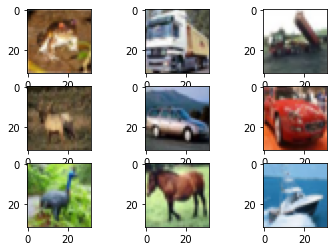

In [4]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [5]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

print(f'Training Data: x = {x_train.shape}, y = {y_train.shape}')
print(f'Testing Data:  x = {x_test.shape}, y = {y_test.shape}')

Training Data: x = (50000, 32, 32, 3), y = (50000, 10)
Testing Data:  x = (10000, 32, 32, 3), y = (10000, 10)


## Instantiating a convnet

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
x_train.shape

(50000, 32, 32, 3)

## Configuring a model for training

In [9]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Preprocess the data

In [11]:
import skimage.transform
new_shape = (150,150,3)
x_train = [skimage.transform.resize(image, new_shape) for image in x_train]
x_test = [skimage.transform.resize(image, new_shape) for image in x_test]

In [12]:
import numpy as np
x_test = np.stack(x_test, axis=0)
x_train = np.stack(x_train, axis=0)

In [13]:
x_test.shape

(10000, 150, 150, 3)

In [14]:
x_train.shape

(50000, 150, 150, 3)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
history = model.fit(
        datagen.flow(x_train, y_train, batch_size=20),
        steps_per_epoch=len(x_train) / 20,
        epochs=20,
        validation_data=datagen.flow(x_test, y_test, batch_size=20),
        validation_steps=len(x_test) / 20)

Epoch 1/20
2500/2500 [==============================] - 477s 191ms/step - loss: 2.0174 - acc: 0.2724 - val_loss: 1.7926 - val_acc: 0.3601
Epoch 2/20
2500/2500 [==============================] - 455s 182ms/step - loss: 1.7199 - acc: 0.3865 - val_loss: 1.6171 - val_acc: 0.4233
Epoch 3/20
2500/2500 [==============================] - 457s 183ms/step - loss: 1.5729 - acc: 0.4365 - val_loss: 1.4889 - val_acc: 0.4682
Epoch 4/20
2500/2500 [==============================] - 450s 180ms/step - loss: 1.4751 - acc: 0.4768 - val_loss: 1.4253 - val_acc: 0.4972
Epoch 5/20
2500/2500 [==============================] - 454s 182ms/step - loss: 1.3856 - acc: 0.5111 - val_loss: 1.3704 - val_acc: 0.5180
Epoch 6/20
2500/2500 [==============================] - 444s 178ms/step - loss: 1.3055 - acc: 0.5418 - val_loss: 1.2894 - val_acc: 0.5428
Epoch 7/20
2500/2500 [==============================] - 441s 176ms/step - loss: 1.2362 - acc: 0.5665 - val_loss: 1.2300 - val_acc: 0.5626
Epoch 8/20
2500/2500 [============

In [16]:
model.save('./results/model_6_2_a.h5')

## Loss and Accuracy during training

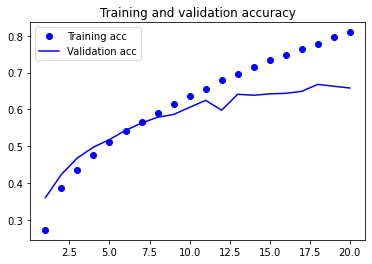

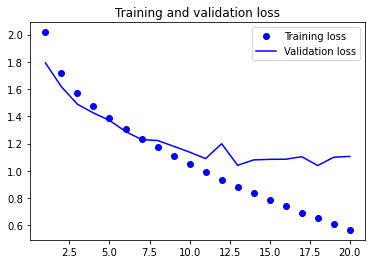

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Part B

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

## Instantiating a convnet

In [27]:
from keras import layers
from keras import models
#from keras.optimizers import SGD

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              #optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['acc'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255)

history = model.fit(
        train_datagen.flow(x_train, y_train, batch_size=20),
        steps_per_epoch=len(x_train) / 20,
        epochs=20,
        validation_data=test_datagen.flow(x_test, y_test, batch_size=20),
        validation_steps=len(x_test) / 20)

Epoch 1/20
2500/2500 [==============================] - 448s 179ms/step - loss: 2.1492 - acc: 0.2011 - val_loss: 1.9773 - val_acc: 0.2738
Epoch 2/20
2500/2500 [==============================] - 447s 179ms/step - loss: 2.0053 - acc: 0.2628 - val_loss: 1.8135 - val_acc: 0.3532
Epoch 3/20
2500/2500 [==============================] - 448s 179ms/step - loss: 1.9008 - acc: 0.3042 - val_loss: 1.7580 - val_acc: 0.3663
Epoch 4/20
2500/2500 [==============================] - 447s 179ms/step - loss: 1.8185 - acc: 0.3391 - val_loss: 1.7575 - val_acc: 0.3754
Epoch 5/20
2500/2500 [==============================] - 461s 184ms/step - loss: 1.7672 - acc: 0.3592 - val_loss: 1.5125 - val_acc: 0.4568
Epoch 6/20
2500/2500 [==============================] - 541s 217ms/step - loss: 1.7263 - acc: 0.3772 - val_loss: 1.5047 - val_acc: 0.4609
Epoch 7/20
2500/2500 [==============================] - 493s 197ms/step - loss: 1.6963 - acc: 0.3851 - val_loss: 1.4505 - val_acc: 0.4791
Epoch 8/20
2500/2500 [============

In [29]:
model.save('./results/model_6_2_b.h5')

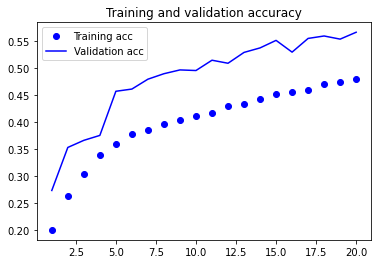

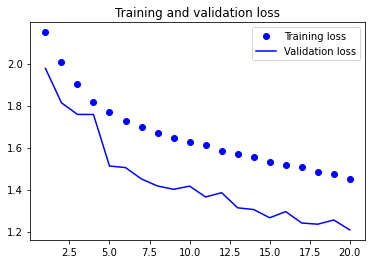

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()